# Lending Club Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading loan data into datadrames named loan_raw 
loan_raw = pd.read_csv("loan.csv", dtype="unicode")

In [2]:
# Checking the columns of loan_raw dataframe
loan_raw.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


# Cleaning and Standardizing Data

In [3]:
#converting loan_raw dataframe to owercase
loan_raw = loan_raw.applymap(lambda x: x.lower() if type(x) == str else x)

In [4]:
#info of loan_raw dataframe
print(loan_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(54), object(57)
memory usage: 33.6+ MB
None


In [5]:
#Dropping columns with all values Null and assigning to new dataframe loan
loan = loan_raw.dropna(axis=1, how='all')

In [6]:
#Checking the percentage of null values in each column
round((((loan.isnull().sum())/len(loan.index))*100),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [7]:
#Dropping Columns which either have high percentage of missing values or values which might not be of used for this analysis
loan = loan.drop(['id', 'member_id', 'url', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis=1)

#Dropping value which are Customer behavour in nature and might not have been available at the time of Loan Application
loan = loan.drop(["total_pymnt", "total_pymnt_inv", "total_rec_int", "last_pymnt_amnt", "revol_bal", "total_rec_prncp", "recoveries", "collection_recovery_fee", "total_rec_late_fee", "out_prncp_inv", "out_prncp", "revol_util", "last_credit_pull_d", "last_pymnt_d", "total_acc", "open_acc", "delinq_2yrs", "inq_last_6mths", "pub_rec", "pub_rec_bankruptcies", "earliest_cr_line"], axis=1)

#Standardizing string values into Numeric like Months, %
loan['int_rate'] = loan['int_rate'].str.rstrip('%')
loan['term'] = loan['term'].str.rstrip('months')

#Dropping observations where loan_status = current
loan = loan.drop(loan.loc[loan['loan_status']=="current"].index)

#Relpacing fully paid with 0 and charged off with 1
loan = loan.replace({'loan_status': {"fully paid": 0, "charged off": 1}})

#dropping samm percentage of observations which have emp length missing
loan = loan.dropna(axis=0)


In [8]:
#Checking shape
pd.set_option('display.max_columns', None)
loan.shape

(36080, 29)

In [9]:
#Dropping columns which have only one Unique value and therefore might not be much useful for Analysis
unique_values = loan.apply(pd.Series.nunique)
columns_with_samevalue = unique_values[unique_values == 1].index
loan = loan.drop(columns_with_samevalue, axis=1)

In [10]:
#Checking count of unique values for each column
loan.nunique().sort_values(ascending=False)

emp_title              26619
title                  16302
installment            14423
funded_amnt_inv         7662
annual_inc              4898
dti                     2842
funded_amnt             1008
loan_amnt                858
zip_code                 815
int_rate                 367
issue_d                   53
addr_state                50
sub_grade                 35
purpose                   14
emp_length                11
grade                      7
home_ownership             5
verification_status        3
loan_status                2
term                       2
dtype: int64

In [11]:
#Dropping Categorical columns which have toomany unique values and could not be used for the analysis
loan = loan.drop(['title', 'emp_title', 'zip_code'], axis=1)

#Converting object type to Numeric
loan['loan_amnt'] = round(pd.to_numeric(loan['loan_amnt']))
loan['funded_amnt'] = round(pd.to_numeric(loan['funded_amnt']))
loan['funded_amnt_inv'] = round(pd.to_numeric(loan['funded_amnt_inv']))
loan['term'] = round(pd.to_numeric(loan['term']))
loan['int_rate'] = round(pd.to_numeric(loan['int_rate']))
loan['installment'] = round(pd.to_numeric(loan['installment']),2)
loan['dti'] = round(pd.to_numeric(loan['dti']),2)
loan['annual_inc'] = round(pd.to_numeric(loan['annual_inc']))



In [12]:
#Checking the data after clean up
loan.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
1,2500,2500,2500.0,60,15.0,59.83,c,c4,< 1 year,rent,30000.0,source verified,dec-11,1,car,ga,1.00
3,10000,10000,10000.0,36,13.0,339.31,c,c1,10+ years,rent,49200.0,source verified,dec-11,0,other,ca,20.00
5,5000,5000,5000.0,36,8.0,156.46,a,a4,3 years,rent,36000.0,source verified,dec-11,0,wedding,az,11.20
6,7000,7000,7000.0,60,16.0,170.08,c,c5,8 years,rent,47004.0,not verified,dec-11,0,debt_consolidation,nc,23.51
7,3000,3000,3000.0,36,19.0,109.43,e,e1,9 years,rent,48000.0,source verified,dec-11,0,car,ca,5.35
9,5375,5375,5350.0,60,13.0,121.45,b,b5,< 1 year,rent,15000.0,verified,dec-11,1,other,tx,18.08
10,6500,6500,6500.0,60,15.0,153.45,c,c3,5 years,own,72000.0,not verified,dec-11,0,debt_consolidation,az,16.12
11,12000,12000,12000.0,36,13.0,402.54,b,b5,10+ years,own,75000.0,source verified,dec-11,0,debt_consolidation,ca,10.78
12,9000,9000,9000.0,36,13.0,305.38,c,c1,< 1 year,rent,30000.0,source verified,dec-11,1,debt_consolidation,va,10.08
13,3000,3000,3000.0,36,10.0,96.68,b,b1,3 years,rent,15000.0,source verified,dec-11,0,credit_card,il,12.56


# Segmented Univariate Analysis

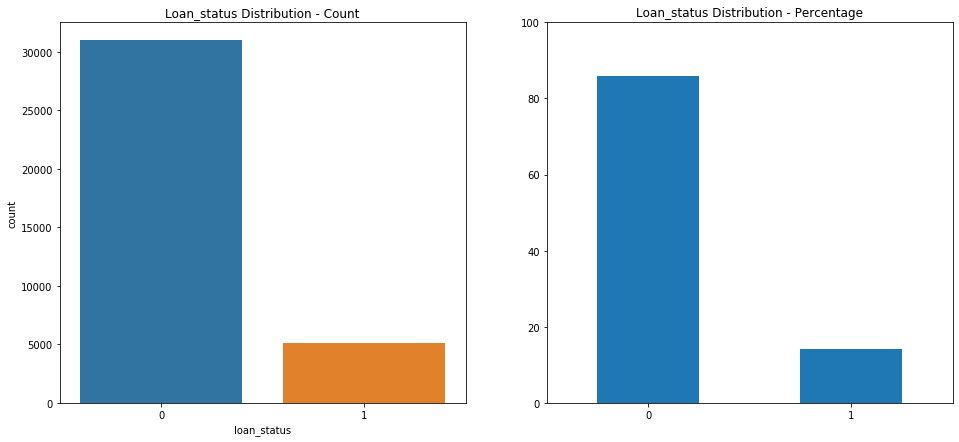

In [13]:
#Creating dataframe with Defaulted observations
uniplotloan = loan.drop(loan.loc[loan['loan_status']==0].index)
uniplotloan['int_rate'] = round(pd.to_numeric(uniplotloan['int_rate']))
uniplotloan['annual_inc'] = round(pd.to_numeric(uniplotloan['annual_inc']))

#create a plot to find the relation between the grade and the default rate
loan_grade_df = loan[['grade','loan_status']]
loan_grade_df = loan_grade_df.drop(loan_grade_df.index[loan_grade_df.loan_status == 0])

#Checking distribution of Loans defaulted (Value 1) and Loans paid (Value 0)
plt.figure(figsize=(16,7))

plt.subplot(1, 2, 1)
sns.countplot(x=loan['loan_status'])
plt.title('Loan_status Distribution - Count')


plt.subplot(1, 2, 2)
((loan['loan_status'].value_counts()*100/len(loan)).sort_values(ascending=False)).plot(kind='bar')
plt.title('Loan_status Distribution - Percentage')
plt.ylim(0, 100)
plt.xticks(rotation=0)
ax = plt.axis()
plt.axis((ax[0],ax[1],ax[2],ax[3]))
plt.show()




In [14]:
#Checking Percentage of Loans Defaulted (Value 1) and Loans paid (Value 0)
round((loan['loan_status'].value_counts()*100/len(loan)).sort_values(ascending=False),2)

0    85.8
1    14.2
Name: loan_status, dtype: float64

# Inference 1: Out of Total Loans (excluding current) 14.2 % of Loans are Defaulted.

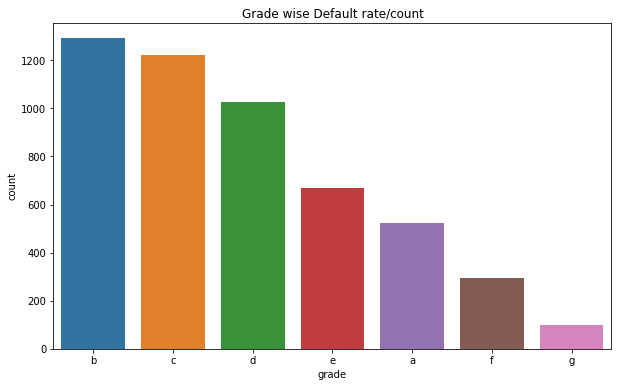

In [15]:
#Grade wise Default rate chart

plt.figure(figsize = (10,6))
sns.countplot(loan_grade_df.grade, order = loan_grade_df.grade.value_counts().index)
plt.xticks(rotation=0)
plt.title('Grade wise Default rate/count')
ax = plt.axis()
plt.axis((ax[0],ax[1],ax[2],ax[3]))
plt.show()


# Inference 2 : The applicants who fall under the Grade 'B' are most likely to default and the applicants from Grade 'G'are less likely to default

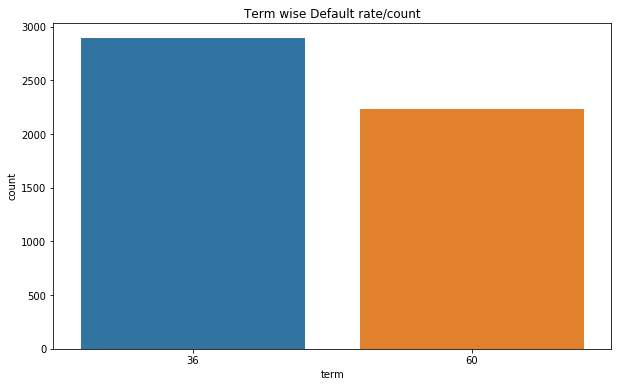

In [16]:
#Term wise Default rate chart

loan_term_df = loan[['term','loan_status']]
loan_term_df = loan_term_df.drop(loan_term_df.index[loan_term_df.loan_status == 0])

plt.figure(figsize = (10,6))
sns.countplot(loan_term_df.term, order = loan_term_df.term.value_counts().index)
plt.title('Term wise Default rate/count')
plt.xticks(rotation=0)
plt.show()

# Inference 3: People who take loans with 36 Months Term are more likely to default. It might be due to the reason that shorter term duration might means that EMI amount might be high.

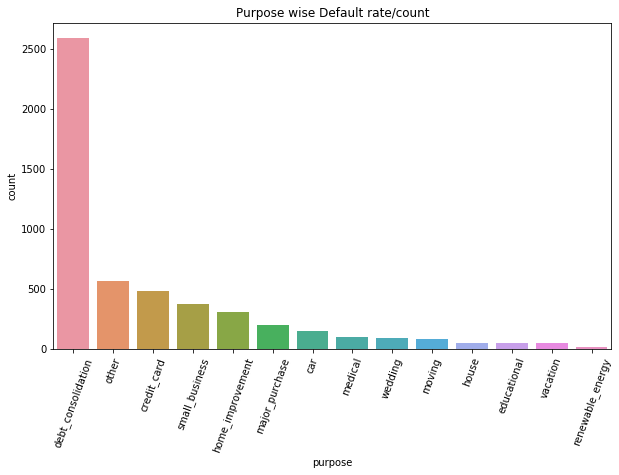

In [17]:
# Purpose wise Default rate chart

loan_purpose_df = loan[['purpose','loan_status']]
loan_purpose_df = loan_purpose_df.drop(loan_purpose_df.index[loan_purpose_df.loan_status == 0])

plt.figure(figsize = (10,6))
sns.countplot(loan_purpose_df.purpose, order = loan_purpose_df.purpose.value_counts().index)
plt.title('Purpose wise Default rate/count')
plt.xticks(rotation=70)
plt.show()

# Inference 4: Loans taken for Debt_consolidation seems to have the highest risk of Defaulting

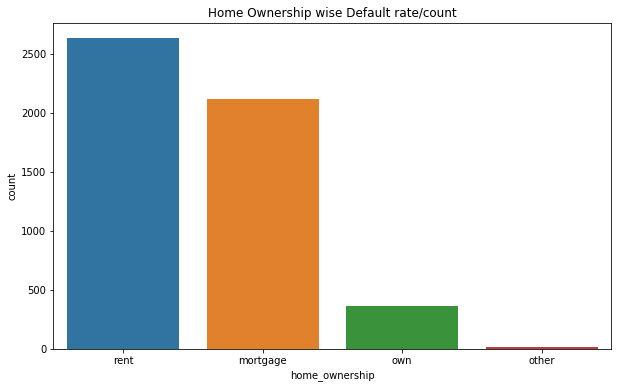

In [18]:
#Home Ownership wise Default rate chart
loan_home_df = loan[['home_ownership','loan_status']]
loan_home_df = loan_home_df.drop(loan_home_df.index[loan_home_df.loan_status == 0])

plt.figure(figsize = (10,6))
sns.countplot(loan_home_df.home_ownership, order = loan_home_df.home_ownership.value_counts().index)
plt.title('Home Ownership wise Default rate/count')
plt.xticks(rotation=0)
plt.show()

# Inference 5: Loans takers with rented Homes are more likely to default, followed by those who have Mortgage. Own Home owners are assumed to be least likely to default as count of other categories seems negligible.

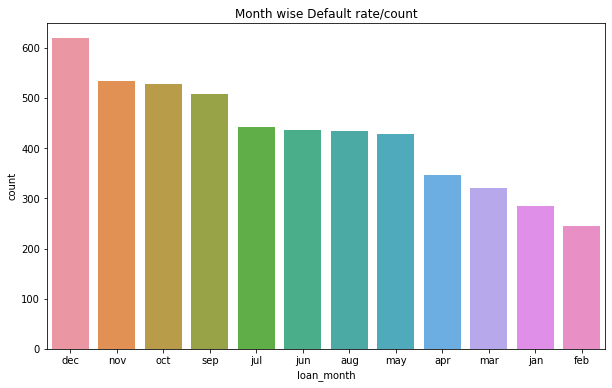

In [19]:
#Month wise default rate chart
loan['loan_month'] = loan['issue_d'].map(lambda x: x[:3])

loan_month_df = loan[['loan_month','loan_status']]
loan_month_df = loan_month_df.drop(loan_month_df.index[loan_month_df.loan_status == 0])

plt.figure(figsize = (10,6))
sns.countplot(loan_month_df.loan_month, order = loan_month_df.loan_month.value_counts().index)
plt.title('Month wise Default rate/count')
plt.xticks(rotation=0)
plt.show()

# Inference 6: The applicants who are issued loan in December month are more likely to default and the applicants who are issued loan in Febraury are least likely to default.

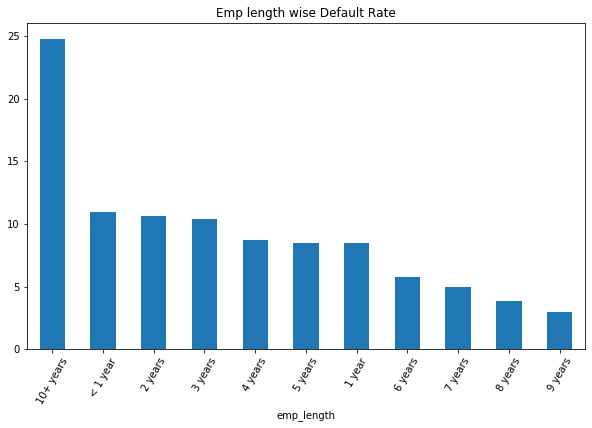

In [20]:
#Emp length wise Default rate Percentage
plt.figure(figsize=(10,6))
(uniplotloan.groupby('emp_length')['loan_status'].sum()*100/len(uniplotloan)).sort_values(ascending=False).plot(kind="bar")
plt.title('Emp length wise Default Rate')
plt.xticks(rotation=60)
ax = plt.axis()
plt.axis((ax[0],ax[1],ax[2],ax[3]))
plt.show()

# Inference 7: Emplyoees with more than 10+ Years of Experience seem to be the one who default the most, but Employees with 9 years of experience seem to be least likely to default. This might be because 10+ years of experience contains all the people with 10 and above years of experience. Therefore we might have to assume tha People with less than 1 year of experience might default the most as seen on the trends. The rate of default goes down as the experience increases.

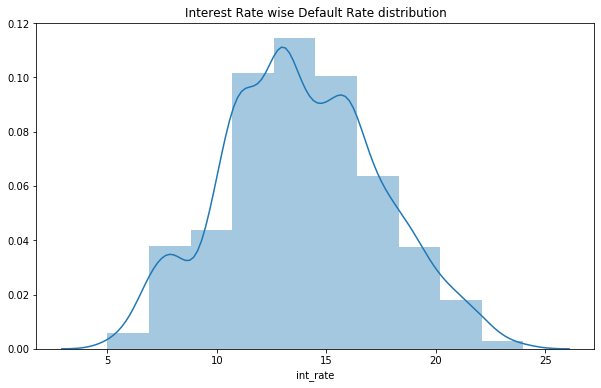

In [21]:
#Checking the distribution of Interestwise default rate
plt.figure(figsize=(10,6))
sns.distplot(uniplotloan['int_rate'], bins=10)
plt.title('Interest Rate wise Default Rate distribution')
ax = plt.axis()
plt.axis((ax[0],ax[1],ax[2],ax[3]))
plt.show()

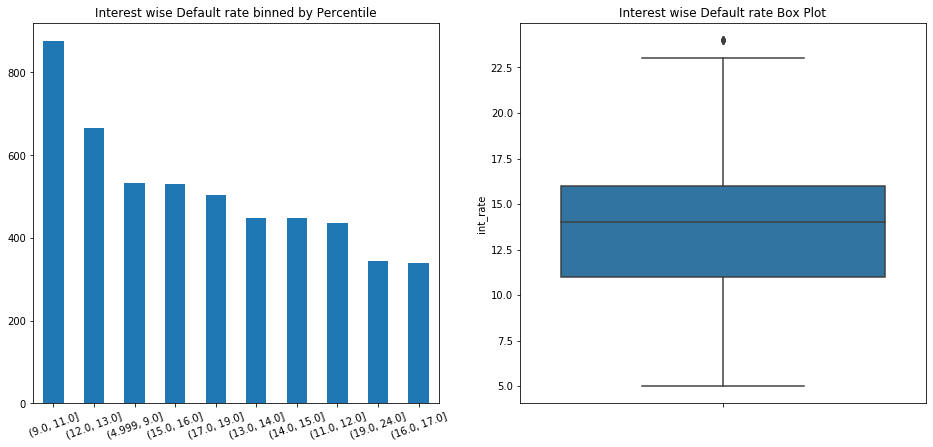

In [22]:
#Interest wise Default rate binned by Percentile
percentile = pd.qcut(uniplotloan['int_rate'], q=10)

plt.figure(figsize=(16,7))

plt.subplot(1, 2, 1)
percentile.value_counts().plot(kind="bar")
plt.title('Interest wise Default rate binned by Percentile')
plt.xticks(rotation=20)

plt.subplot(1, 2, 2)
sns.boxplot(y=uniplotloan["int_rate"])
plt.title('Interest wise Default rate Box Plot')
plt.show()



# Inference 8: Based on above Plot we know that interest rate of 9%to11% is the most like to default. Also we could see that Distribut is normal and outliers are less.

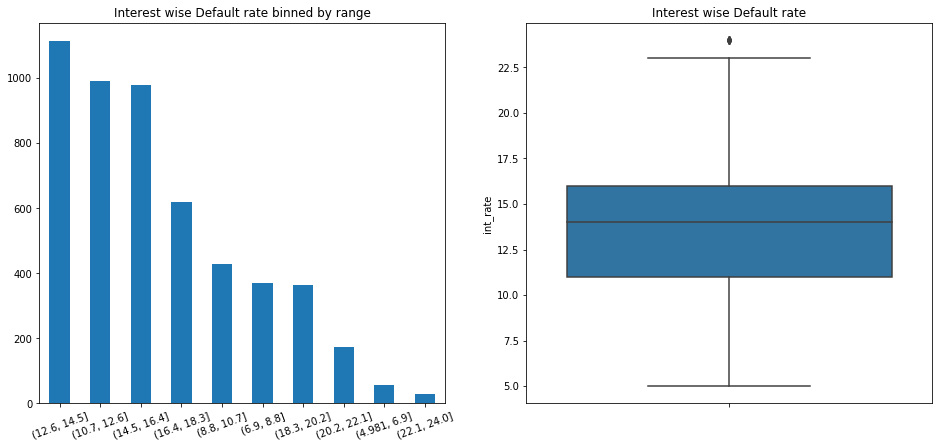

In [23]:
#Interest wise Default rate binned by range
normalbin_intrate = pd.cut(uniplotloan['int_rate'], bins=10)

plt.figure(figsize=(16,7))

plt.subplot(1, 2, 1)
normalbin_intrate.value_counts().plot(kind="bar")
plt.title('Interest wise Default rate binned by range')
plt.xticks(rotation=20)

plt.subplot(1, 2, 2)
sns.boxplot(y=uniplotloan["int_rate"])
plt.title('Interest wise Default rate')
plt.show()

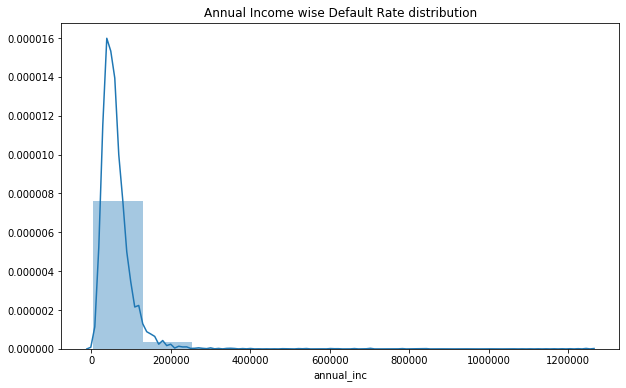

In [24]:
#Checking the distribution of Annual Income wise Default rate
plt.figure(figsize=(10,6))
sns.distplot(uniplotloan['annual_inc'], bins=10)
plt.title('Annual Income wise Default Rate distribution')
ax = plt.axis()
plt.axis((ax[0],ax[1],ax[2],ax[3]))
plt.show()

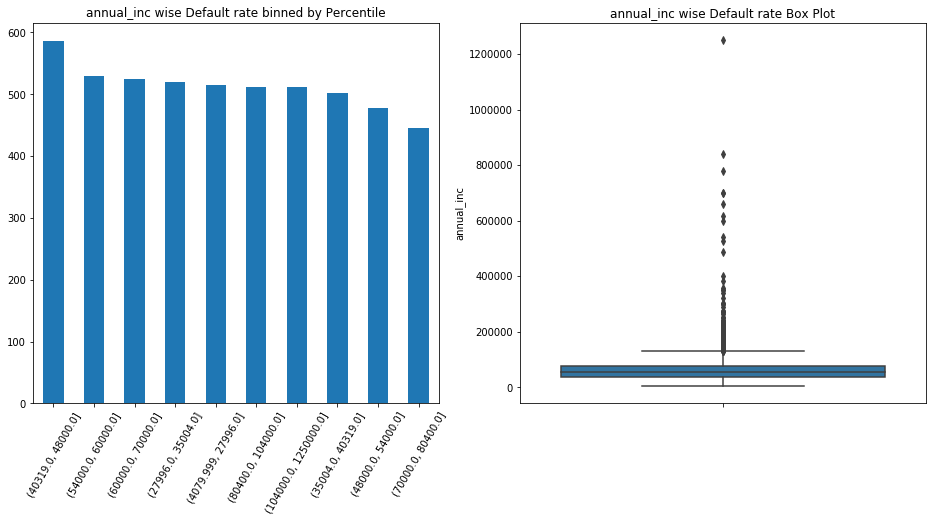

In [25]:
#Annual_inc wise Default rate binned by Percentile
percentile_income = pd.qcut(uniplotloan['annual_inc'], q=10)

plt.figure(figsize=(16,7))

plt.subplot(1, 2, 1)
percentile_income.value_counts().plot(kind="bar")
plt.title('annual_inc wise Default rate binned by Percentile')
plt.xticks(rotation=60)

plt.subplot(1, 2, 2)
sns.boxplot(y=uniplotloan["annual_inc"])
plt.title('annual_inc wise Default rate Box Plot')
plt.show()

# Inference 9: Based on above Plot we know that loan takers with Income range of  40300 to 48000 are the most likely to default. Also we could see that Distribut is skewed and outliers are more. In this case binning using quantile cut or percentile based is preferred. Also there is not much variance in rate of default for other bins.

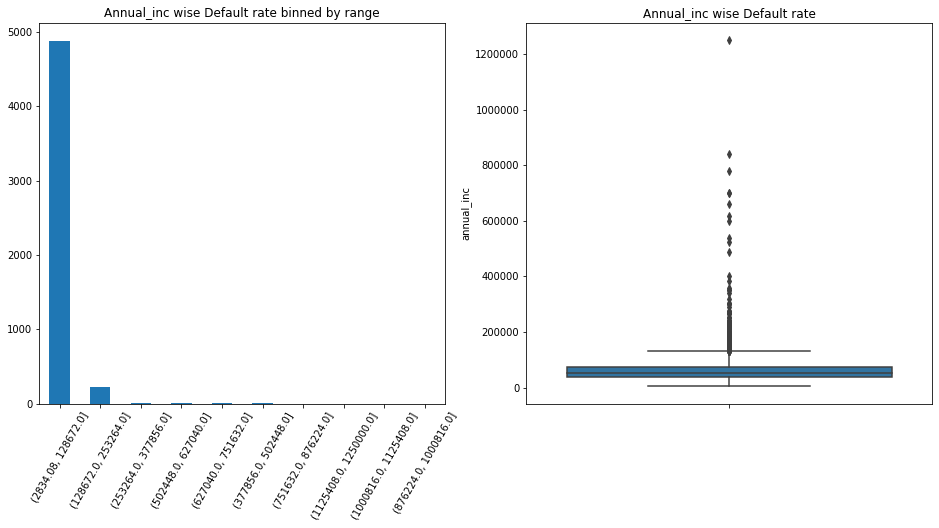

In [26]:
#Annual_inc wise Default rate binned by Percentile
normalbin_annualinc = pd.cut(uniplotloan['annual_inc'], bins=10)

plt.figure(figsize=(16,7))

plt.subplot(1, 2, 1)
normalbin_annualinc.value_counts().plot(kind="bar")
plt.title('Annual_inc wise Default rate binned by range')
plt.xticks(rotation=60)

plt.subplot(1, 2, 2)
sns.boxplot(y=uniplotloan["annual_inc"])
plt.title('Annual_inc wise Default rate')
plt.show()

# Bivariate Analysis

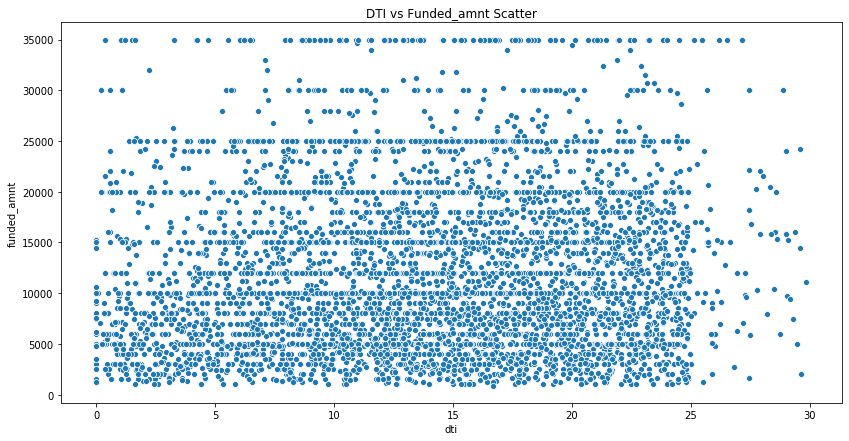

In [50]:
#Bivariate scatter plot DTI vs Funded_amnt
bi_df = uniplotloan[['funded_amnt','dti']]

plt.figure(figsize = (14,7))
sns.scatterplot(x="dti", y="funded_amnt", data=bi_df, ci=60)
plt.title('DTI vs Funded_amnt Scatter')
plt.show()

# Inference 10: From above scatter plot slight trend  can be observed in lower income range where Debt to Income ratio is High, Default rate density seems to be higher. As Income increases and DTI decreases the density of default rate also decreases.


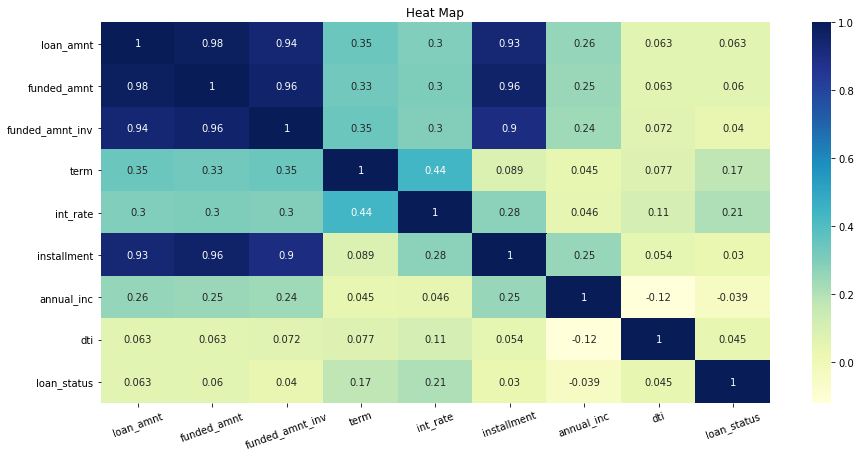

In [52]:
#Heat map numerical values in loan dataframe

corr_matirx = loan[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'loan_status']].corr()
plt.figure(figsize = (15,7))
ax = sns.heatmap(corr_matirx, annot = True, cmap='YlGnBu')
plt.title('Heat Map')
plt.xticks(rotation=20)
plt.show()

# Inference 11: From Above Heatmap we can see that Term and Interest rate has a slight postive correlation with Default rate. Loan Amount, funded_amount and Amount_funded_inv have high correlation among themselves and also with installment which is expected. Income has postive correlation with Amount funded. Income also has slightly negative correlation with Default rate which would imply Higher Income groups would be less likely to default. DTI has negative correlation with Income, As Income increases DTI will decrease.

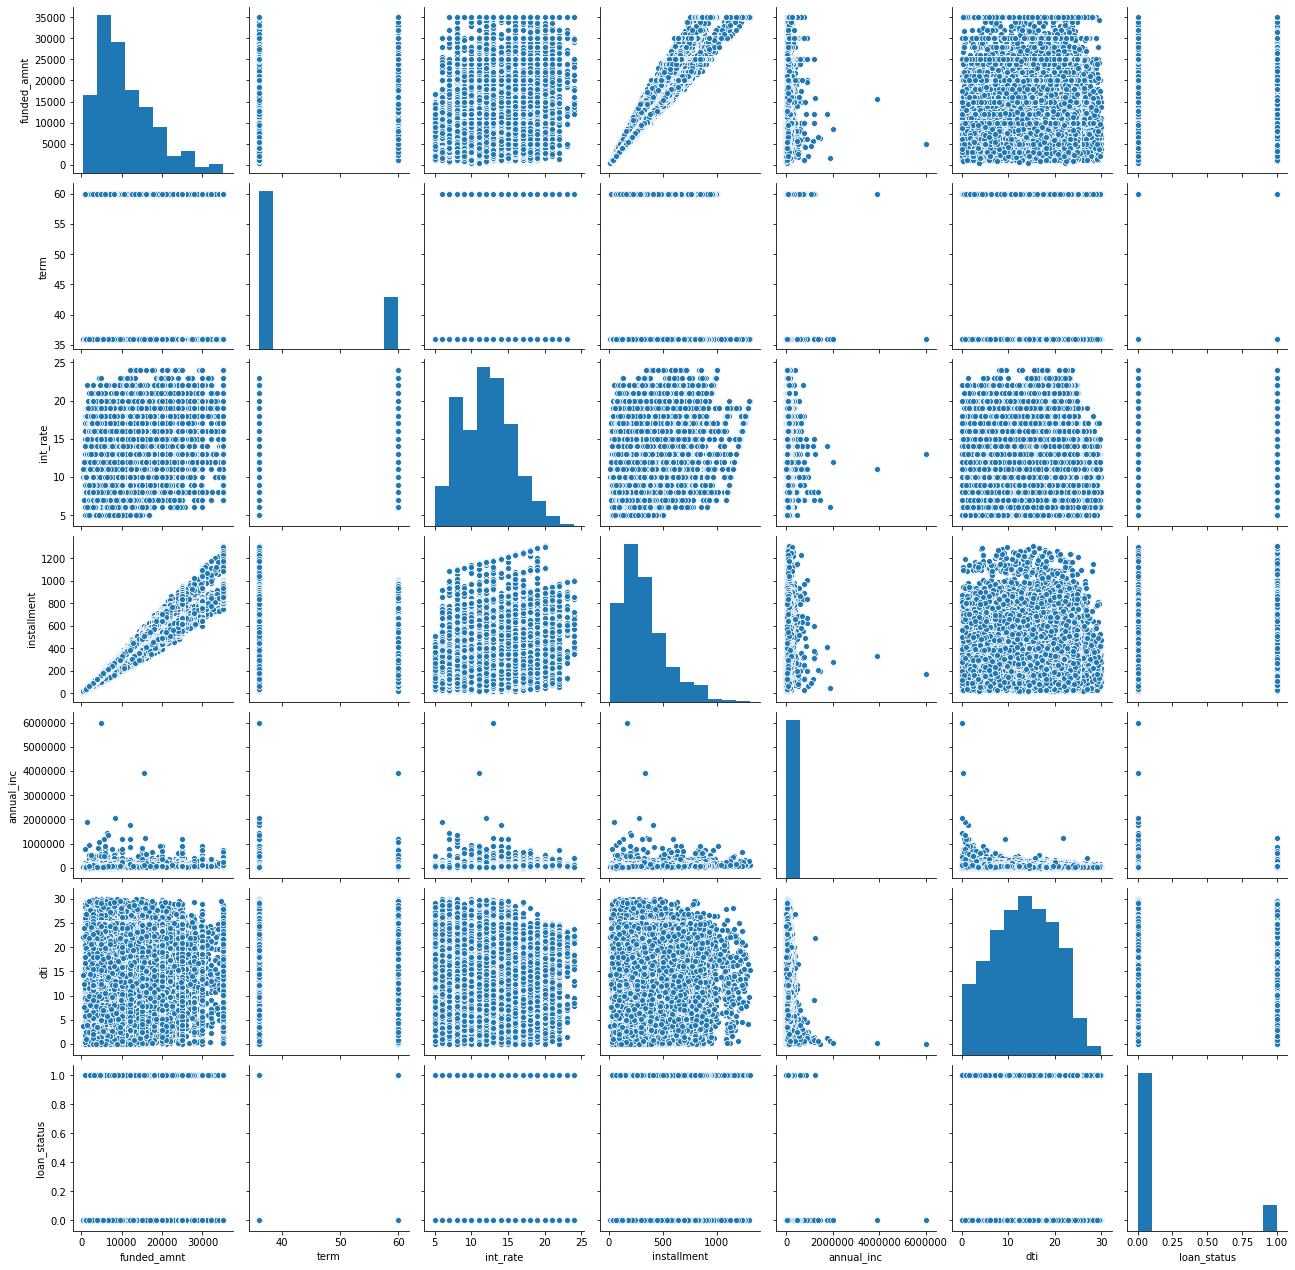

In [45]:
#Pair plot of numerical values in loan dataframe (Loan_amnt and funded_amnt_inv has been removed since they are similar & highly correlated with funded_amnt)
matrix = loan[['funded_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'loan_status']]
sns.pairplot(matrix)
plt.show()